In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

In [2]:
data = pd.read_csv('processed_data_PCA.csv')

X = data.drop('y', axis=1)
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8796 - loss: 0.3827 - val_accuracy: 0.8795 - val_loss: 0.3350
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8865 - loss: 0.3188 - val_accuracy: 0.8901 - val_loss: 0.3116
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8904 - loss: 0.3086 - val_accuracy: 0.8901 - val_loss: 0.3053
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8931 - loss: 0.2982 - val_accuracy: 0.8909 - val_loss: 0.3087
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8900 - loss: 0.2946 - val_accuracy: 0.8909 - val_loss: 0.3010
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8961 - loss: 0.2914 - val_accuracy: 0.8901 - val_loss: 0.3014
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8966 - loss: 0.2866 - val_accuracy: 0.8918 - val_loss: 0.2970
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8946 - loss: 0.2863 - val_accuracy: 0

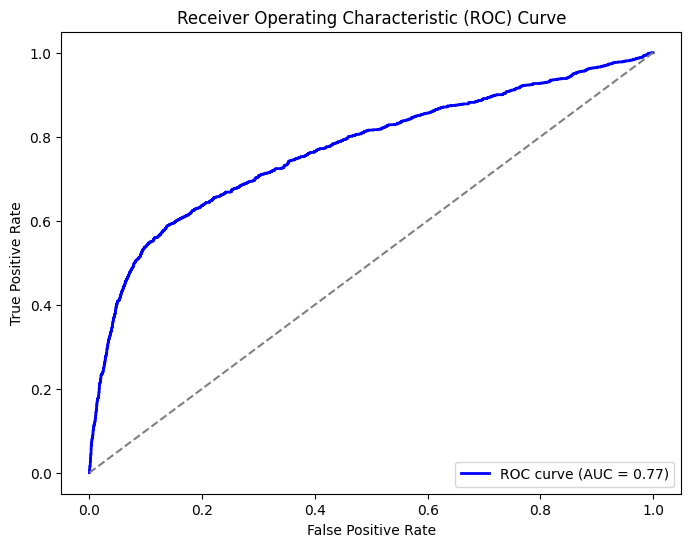

AUC: 0.77


In [3]:
from sklearn.model_selection import train_test_split

# Build the model
model = Sequential()

# Input layer: Define the number of input features (adjust based on dataset)
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.3))  # Regularization using dropout

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Training the model (adjust the epochs and batch size based on dataset)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

# Evaluate the model on test data (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32") 

# Print classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

tunning

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

# Clear any previous TensorFlow session
K.clear_session()

# Define the HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), 
                        activation='relu', input_dim=X_train.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        # Second hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Hyperparameter for learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,             # Number of different models to try
    executions_per_trial=3,    # Number of times to train each model
    directory='tuner_results', # Directory to store the results
    project_name='banking_model_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32,
             validation_split=0.2)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Manually rebuild the best model
best_model = Sequential()
best_model.add(Dense(units=best_hyperparameters.get('units_1'), 
                     activation='relu', 
                     input_dim=X_train.shape[1]))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_1')))
best_model.add(Dense(units=best_hyperparameters.get('units_2'), 
                     activation='relu'))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_2')))
best_model.add(Dense(1, activation='sigmoid'))

best_model.compile(optimizer=Adam(learning_rate=best_hyperparameters.get('learning_rate')),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the manually rebuilt best model
history = best_model.fit(X_train, y_train, 
                         epochs=50, 
                         batch_size=32, 
                        validation_split=0.2)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy}")


C:\Users\wasif\AppData\Local\Temp\ipykernel_5984\45028931.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel



Reloading Tuner from tuner_results\banking_model_tuning\tuner0.json
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.4, 'learning_rate': 0.00024717828492385585}


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8739 - loss: 0.4018 - val_accuracy: 0.8817 - val_loss: 0.3233
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8863 - loss: 0.3236 - val_accuracy: 0.8872 - val_loss: 0.3290
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8878 - loss: 0.3168 - val_accuracy: 0.8886 - val_loss: 0.3105
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8923 - loss: 0.3028 - val_accuracy: 0.8875 - val_loss: 0.3133
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8915 - loss: 0.2983 - val_accuracy: 0.8911 - val_loss: 0.3036
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8946 - loss: 0.2929 - val_accuracy: 0.8901 - val_loss: 0.3025
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8950 - loss: 0.2888 - val_accuracy: 0.8898 - val_loss: 0.3002
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8903 - loss: 0.3014 - val_accuracy: 0

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9111 - loss: 0.2423 - val_accuracy: 0.8893 - val_loss: 0.3140
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9084 - loss: 0.2534 - val_accuracy: 0.8882 - val_loss: 0.3169
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9125 - loss: 0.2442 - val_accuracy: 0.8880 - val_loss: 0.3172
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9112 - loss: 0.2450 - val_accuracy: 0.8884 - val_loss: 0.3196
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9098 - loss: 0.2495 - val_accuracy: 0.8883 - val_loss: 0.3210
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9086 - loss: 0.2471 - val_accuracy: 0.8878 - val_loss: 0.3236
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9090 - loss: 0.2508 - val_accuracy: 0.8879 - val_loss: 0.3198
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9131 - loss: 0.2381 - val_accuracy: 0.

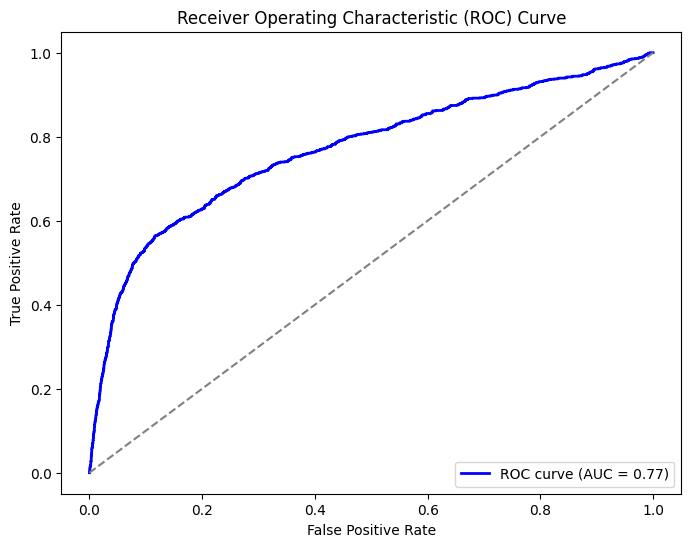

AUC: 0.77
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.4, 'learning_rate': 0.00024717828492385585}


In [5]:
# Get the history of the best model's training
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on the test data (X_test and y_test)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set (for ROC curve)
y_prob = best_model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")